# 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
glass = pd.read_csv("/content/glass.csv", delimiter=';')
glass

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
...,...
228,"1.51623,14.14,0,2.88,72.61,0.08,9.18,1.06,0,7"
229,"1.51685,14.92,0,1.99,73.06,0,8.4,1.59,0,7"
230,"1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7"
231,"1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7"


In [29]:
glass.head()

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


In [30]:
glass.describe()

,Prepare a model for glass classification using Random Forest
count,233
unique,232
top,"1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0,1"
freq,2


In [38]:
print(glass.dtypes)

Prepare a model for glass classification using Random Forest    object
dtype: object


In [31]:
glass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  233 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [32]:
glass.isnull().sum()

Prepare a model for glass classification using Random Forest    0
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [34]:
glass = glass.dropna(axis=1, how='all')
glass = glass.drop(columns=['NaN'], errors='ignore')

# 2. Data Visualization

In [44]:
glass = glass.iloc[:, 0].str.split(',', expand=True)

In [45]:
glass.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [48]:
print(glass['Type'].isnull().sum())

18


In [49]:
glass = glass.dropna(subset=['Type'])

In [50]:
for col in glass.columns[:-1]:
    glass[col] = pd.to_numeric(glass[col], errors='coerce')


In [52]:
print(glass['Type'].unique())

['Type' '1' '2' '3' '5' '6' '7']


In [53]:
glass = glass[glass['Type'].apply(lambda x: x.isnumeric())]

In [54]:
glass['Type'] = glass['Type'].astype(int)

In [55]:
print(glass.head())

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
19  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
20  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
21  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
22  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
23  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [56]:
print(glass.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


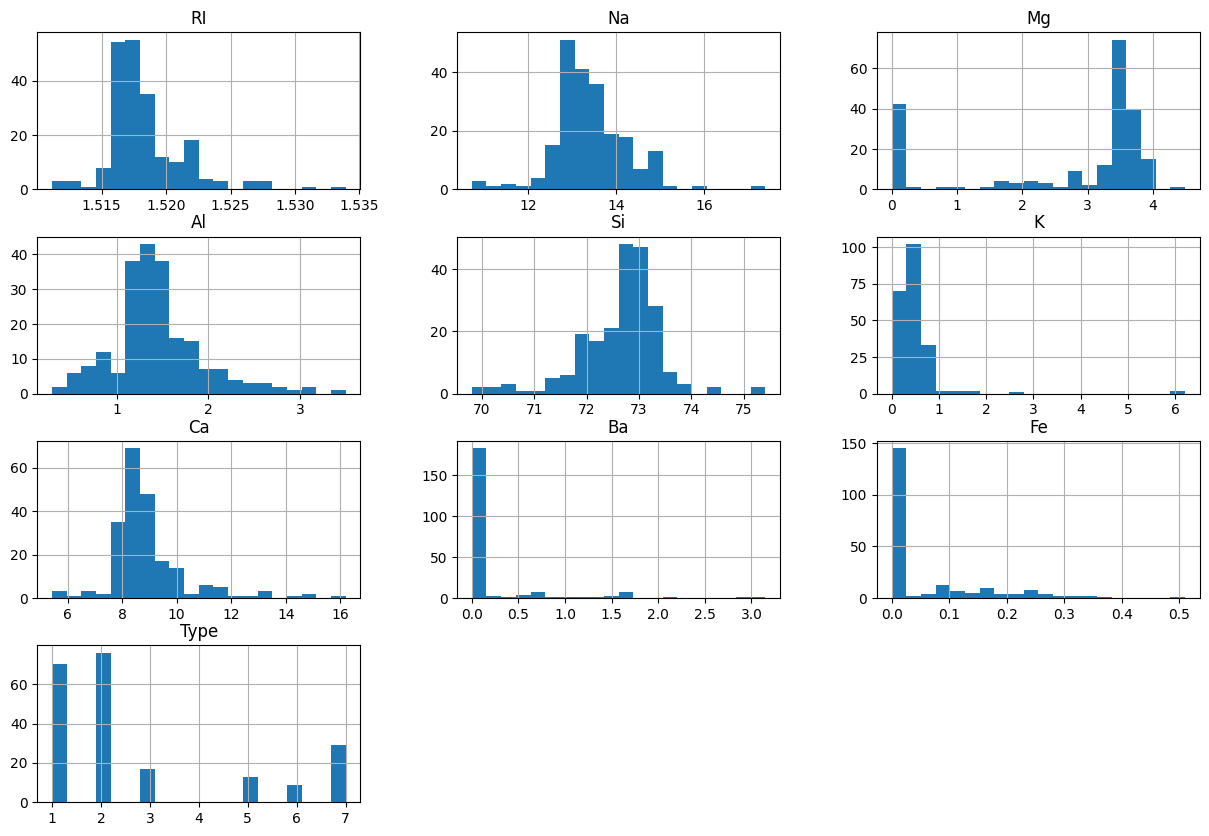

In [57]:
glass.hist(bins=20, figsize=(15, 10))
plt.show()

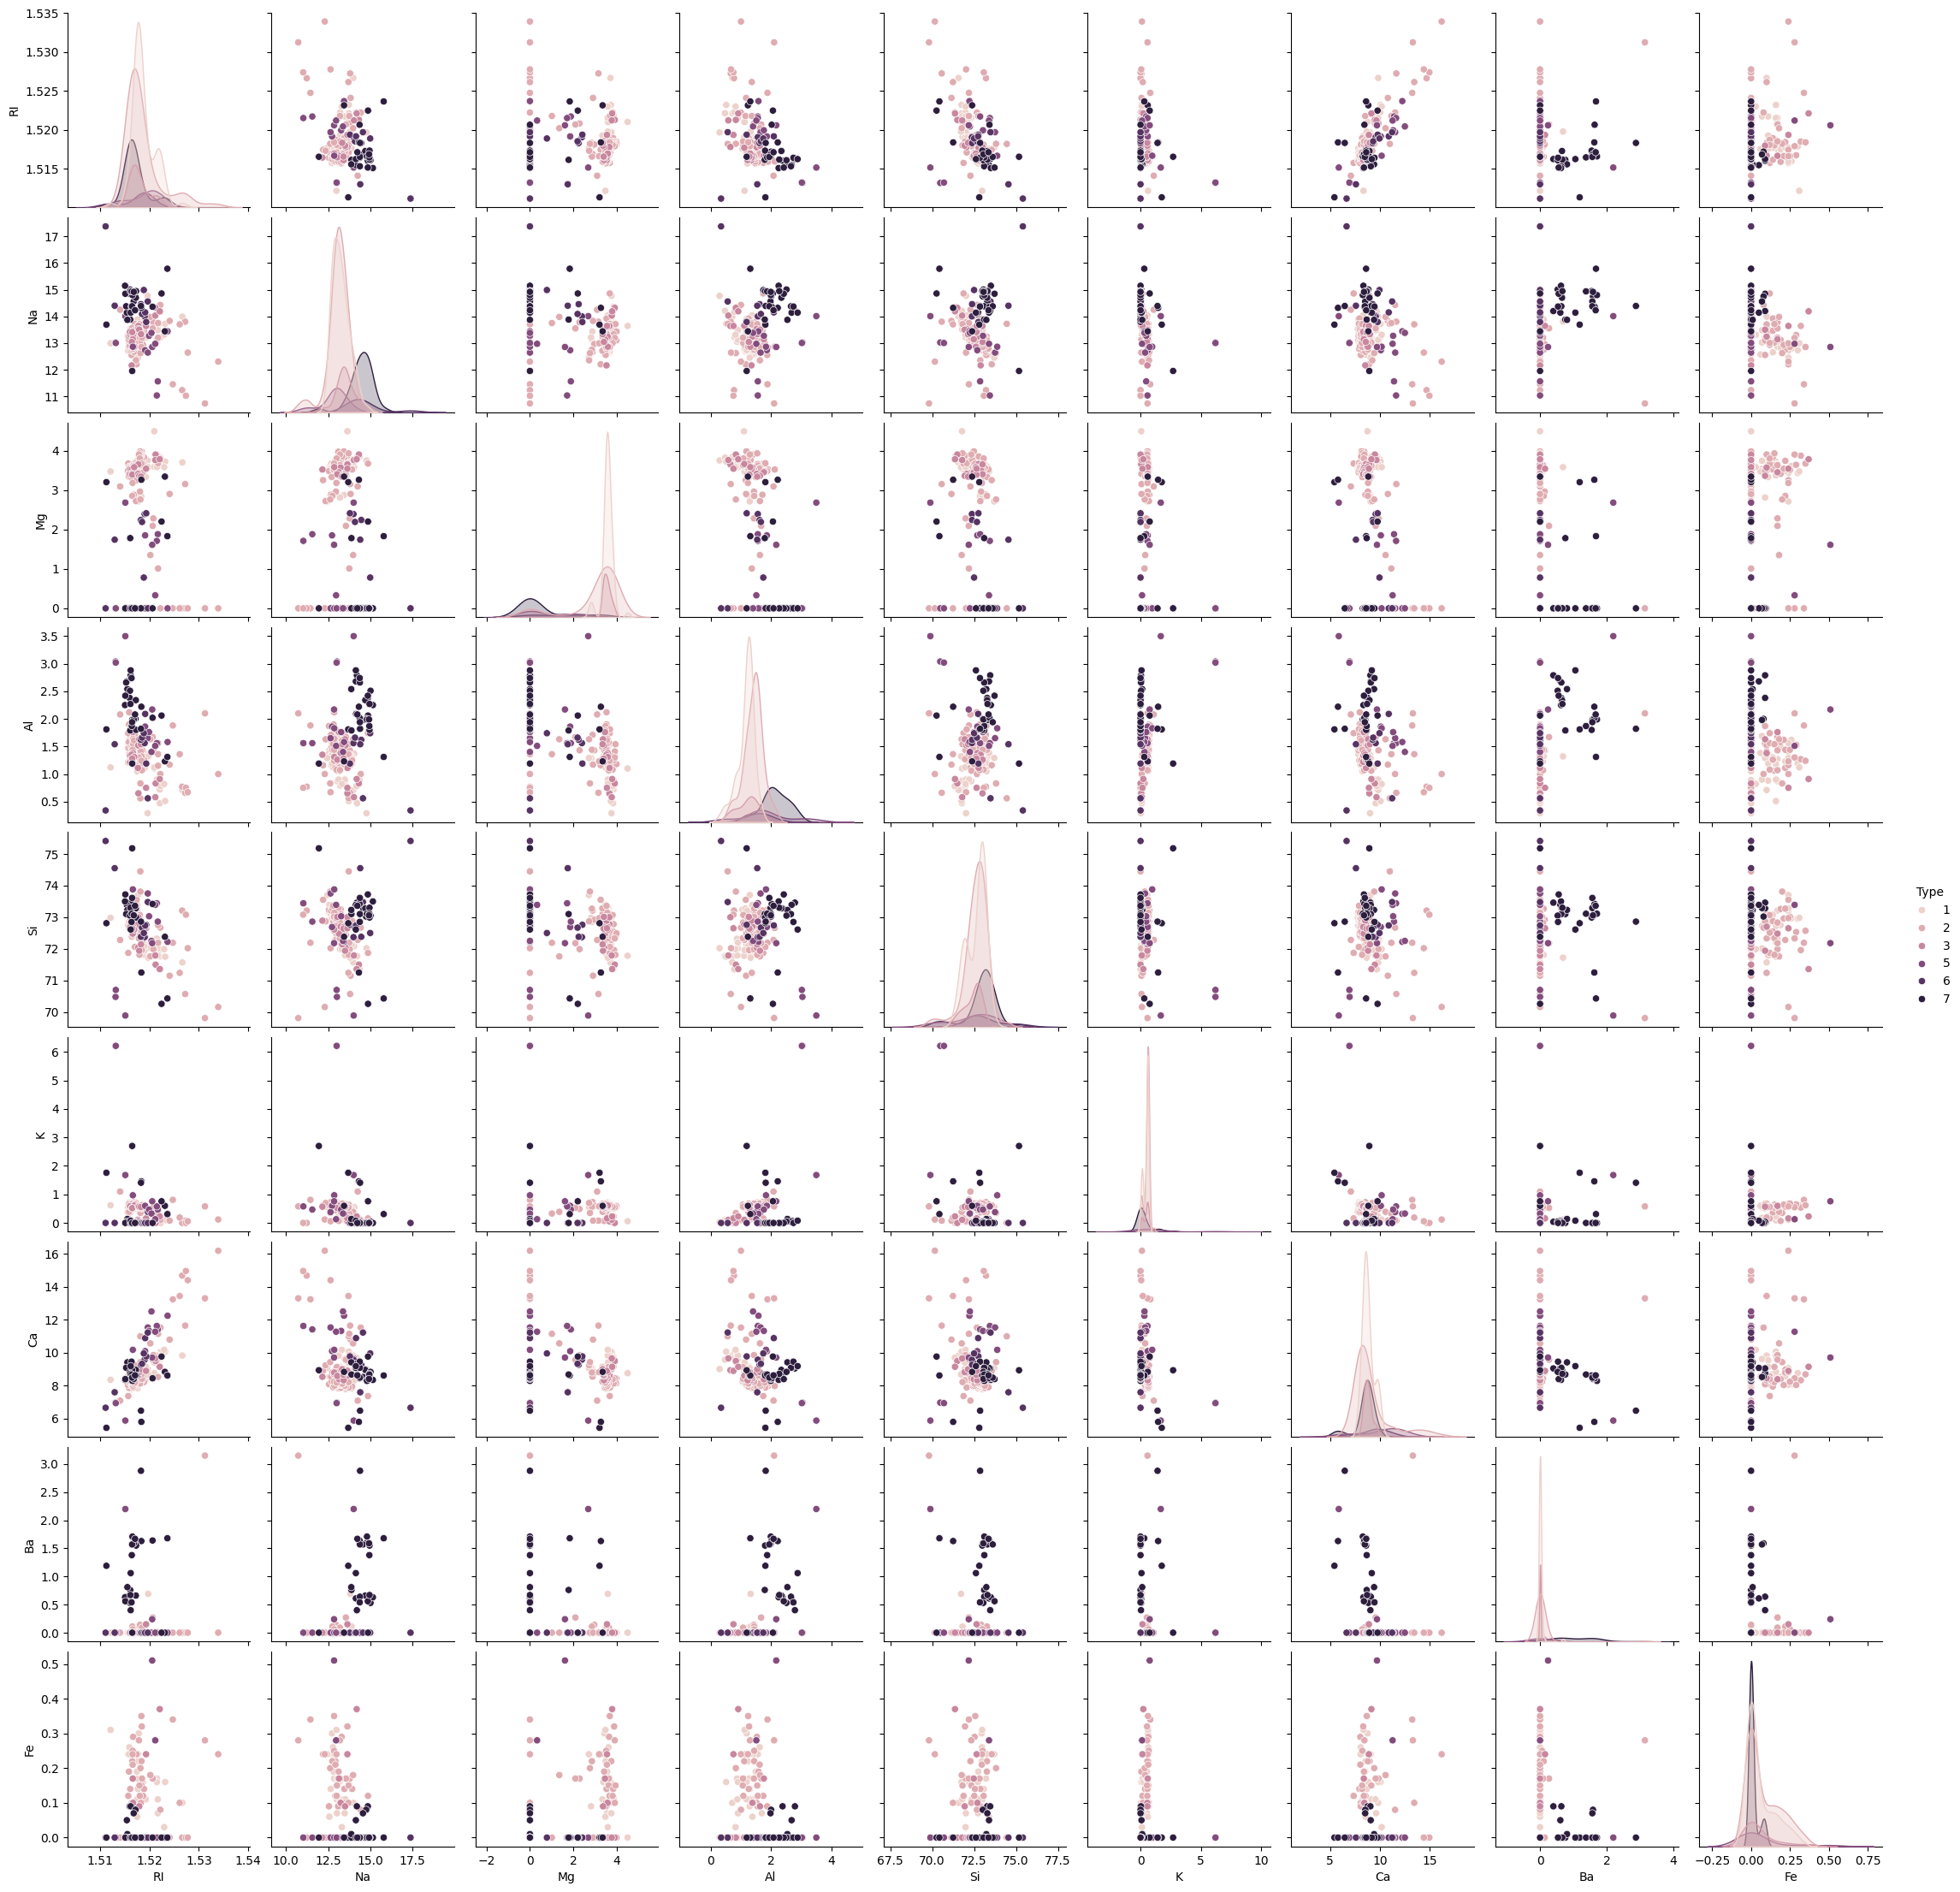

In [58]:
sns.pairplot(glass, hue='Type')
plt.show()

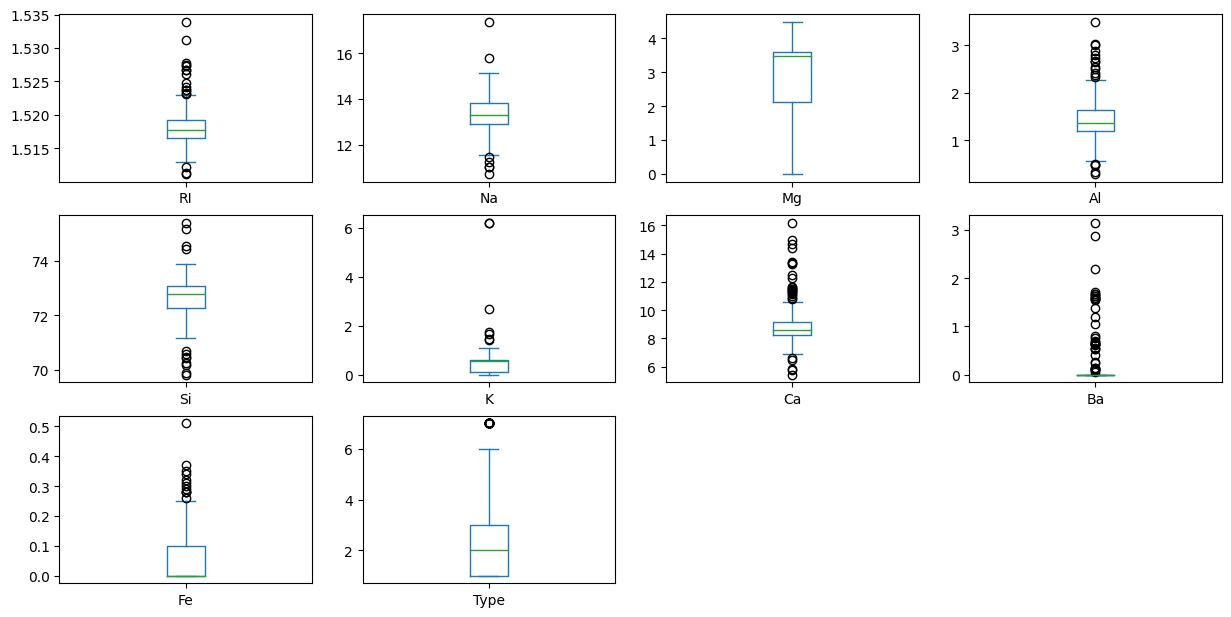

In [59]:
glass.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

# 3.Data Preprocessing

In [60]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
X = glass.drop('Type', axis=1)
y = glass['Type']


In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Random Forest Model Implementation

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [68]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
X_train.shape

(171, 9)

In [70]:
X_test.shape

(43, 9)

In [71]:
y_pred = rf_model.predict(X_test)

In [72]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 1, 7, 1])

In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [74]:
accuracy

0.8372093023255814

In [75]:
precision

0.866828165374677

In [76]:
recall

0.8372093023255814

In [78]:
f1

0.8330452594474481

# 5. Bagging and Boosting Methods

.Bagging

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)

In [81]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [82]:
y_pred_bagging = bagging_model.predict(X_test)


In [84]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [85]:
accuracy_bagging, precision_bagging, recall_bagging, f1_bagging

(0.8372093023255814,
 0.8568475452196384,
 0.8372093023255814,
 0.8296046862394331)

.Boosting

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
boosting_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)

In [88]:
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                   random_state=42)

In [89]:
y_pred_boosting = boosting_model.predict(X_test)

In [90]:
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')


In [91]:
accuracy_boosting, precision_boosting, recall_boosting, f1_boosting

(0.8372093023255814, 0.8469915097822075, 0.8372093023255814, 0.828960679083798)

.Comparing Results

In [92]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'Boosting'],
    'Accuracy': [accuracy, accuracy_bagging, accuracy_boosting],
    'Precision': [precision, precision_bagging, precision_boosting],
    'Recall': [recall, recall_bagging, recall_boosting],
    'F1 Score': [f1, f1_bagging, f1_boosting]
})

In [93]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.837209,0.866828,0.837209,0.833045
1,Bagging,0.837209,0.856848,0.837209,0.829605
2,Boosting,0.837209,0.846992,0.837209,0.828961
